### Business Problem : Predict the sale price of a car

### 1. Importing Required Libraries

In [1]:
#importing required libraries 
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### 2. Reading file 

In [2]:
#reading the csv file

raw_df = pd.read_csv('datasets_33080_1320127_car data.csv')
raw_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
#shape
raw_df.shape

(301, 9)

### 3. EDA + Data Treatment

In [4]:
#rows and columns

print('The dataset has: \n {} no. of rows \n {} no. of columns'.format(raw_df.shape[0],raw_df.shape[1]))

The dataset has: 
 301 no. of rows 
 9 no. of columns


In [5]:
# checking general information

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
raw_df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

### Observation:
#### 1. The dataset has 4 variables containing string type data -----> Categorical Variable
#### 2. The dataset has 5 variables containing float and int type data -----> Numerical Variables
#### 3. The dataset does not have any null values

In [7]:
#column names
col_raw = raw_df.columns
col_raw

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#Separating categorical variables from numerical

cat_v = ['Car_Name','Fuel_Type', 'Seller_Type', 'Transmission']
num_v = [v for v in col_raw if v not in cat_v]
num_v

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [9]:
#rearranging columns order

raw_df = raw_df [['Car_Name', 'Year', 'Kms_Driven',
                  'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','Present_Price', 'Selling_Price']]
raw_df.head()

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
0,ritz,2014,27000,Petrol,Dealer,Manual,0,5.59,3.35
1,sx4,2013,43000,Diesel,Dealer,Manual,0,9.54,4.75
2,ciaz,2017,6900,Petrol,Dealer,Manual,0,9.85,7.25
3,wagon r,2011,5200,Petrol,Dealer,Manual,0,4.15,2.85
4,swift,2014,42450,Diesel,Dealer,Manual,0,6.87,4.60


In [10]:
#Checking distribution of categorical data with Selling_Price

for i in cat_v:
    print(raw_df[i].value_counts(dropna = False))

city                 26
corolla altis        16
verna                14
fortuner             11
brio                 10
                     ..
Hero  CBZ Xtreme      1
Activa 4g             1
Suzuki Access 125     1
land cruiser          1
Honda Dream Yuga      1
Name: Car_Name, Length: 98, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
# Function to print height of barcharts on the bars

def barh(ax): # for getting height
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))


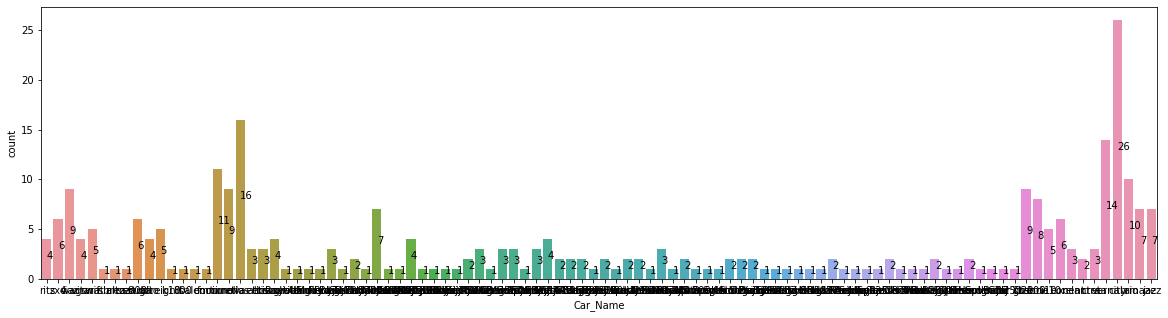

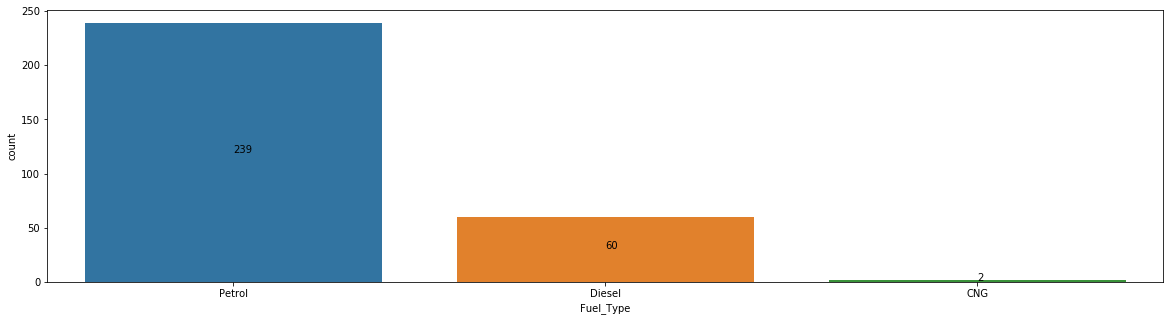

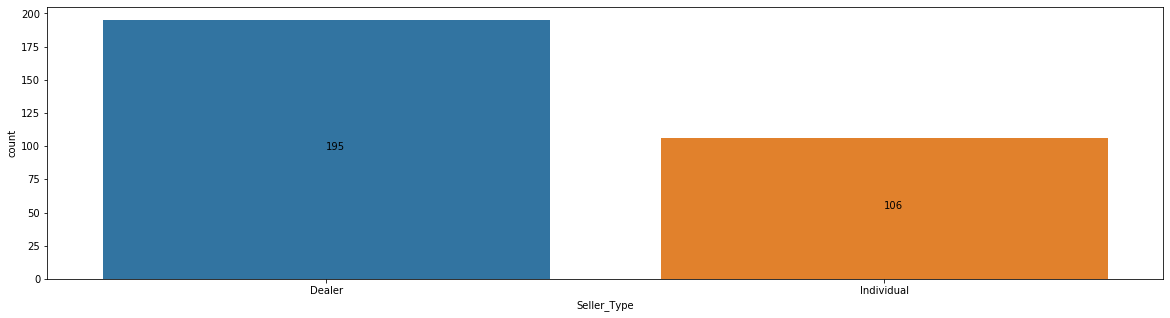

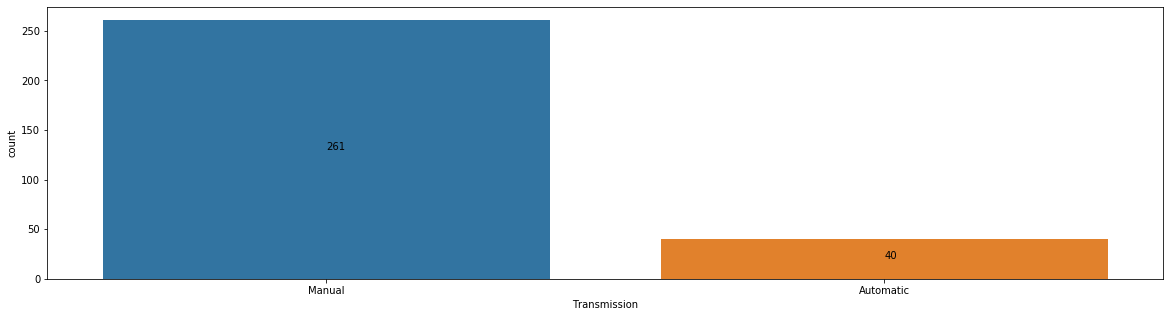

In [12]:
#Let's Plot these distribution

for i in cat_v:  # we are looping over categorical variables and plotting their distributions
    plt.figure(figsize=(20,5))
    ax = sns.countplot(data = raw_df, x=i)
    barh(ax)
    plt.show()
    

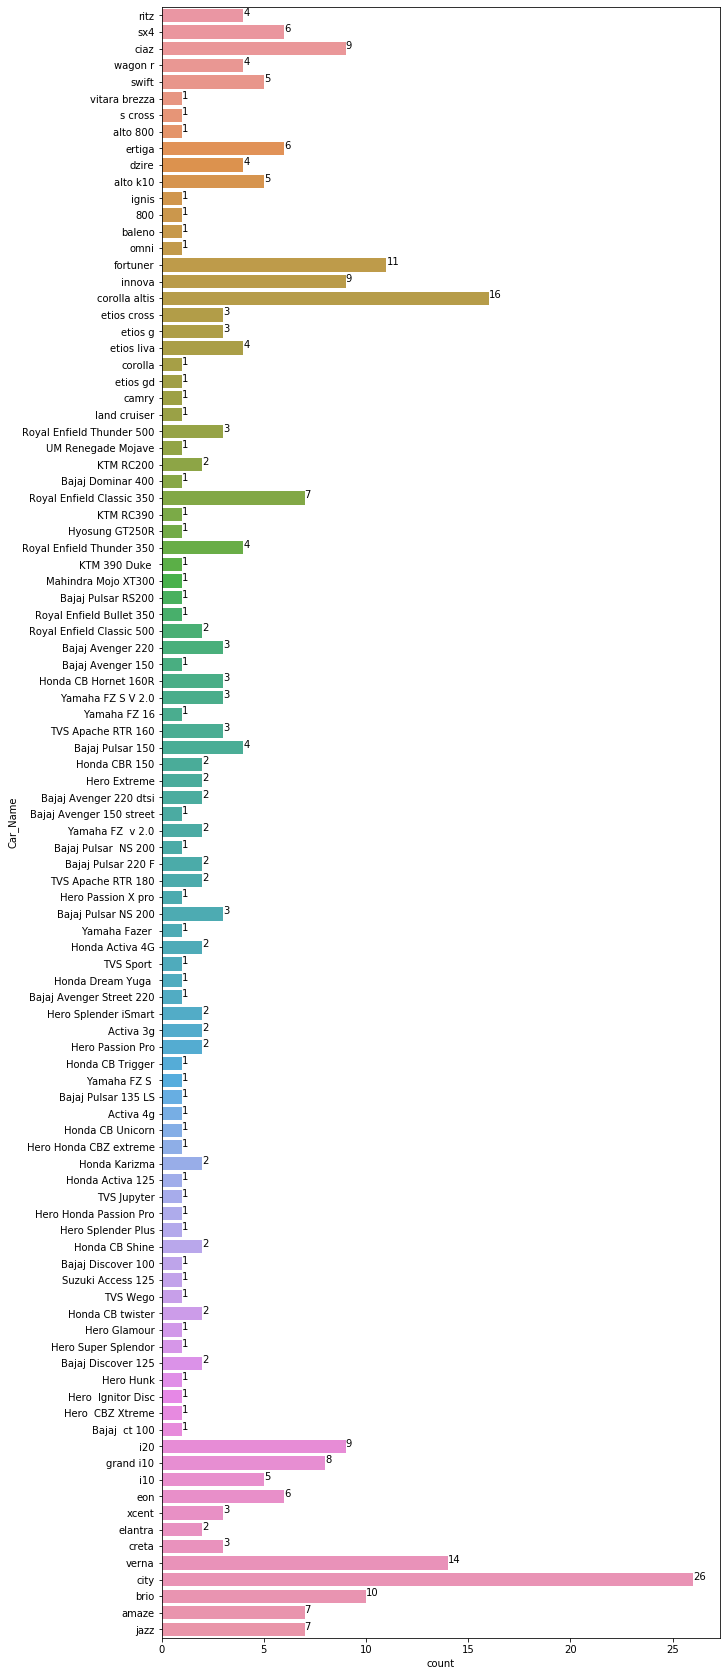

In [13]:
#lets see the car name distribution again

# Function to print width of barcharts on the bars

def barw(ax): # for getting height
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))


plt.figure(figsize=(10,30))
ax0 = sns.countplot(data = raw_df, y ='Car_Name',)
barw(ax0)
plt.show()

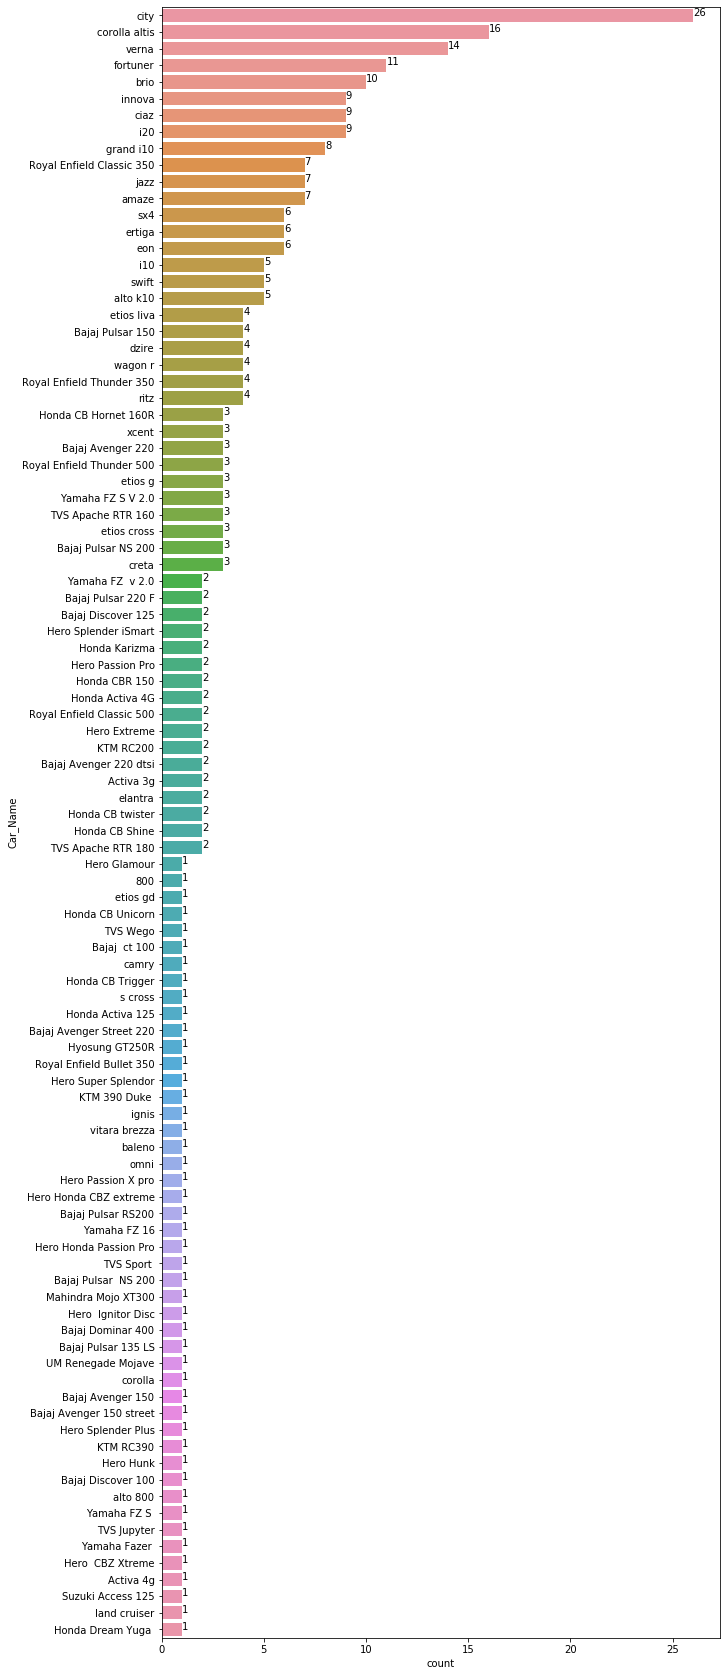

In [14]:
# we can see that honda city has the highest frequency
# lets order them 

#lets see the car name distribution again

plt.figure(figsize=(10,30))
ax1 = sns.countplot(data = raw_df, y ='Car_Name', order = raw_df['Car_Name'].value_counts().index) # order = raw_df['Car_Name'].value_counts().index
barw(ax1)
plt.show()

### Observations:
#### 1. Petrol cars are most preffered
#### 2. Most people tend to buy from a car dealer over individual sellers
#### 3. People seem to like manual cars more than auto cars
#### 4. Car Honda City has the highest popularity 

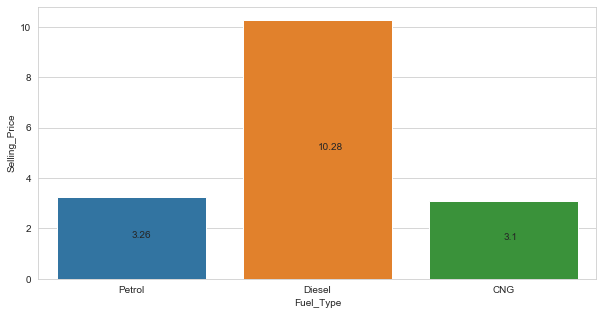

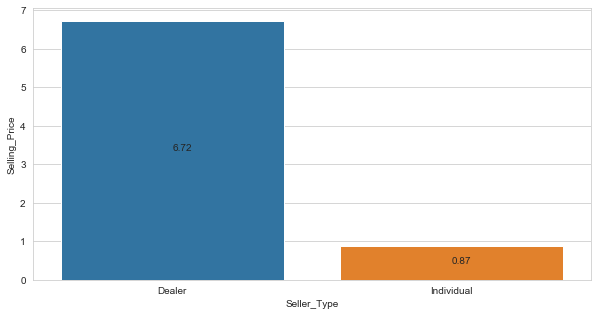

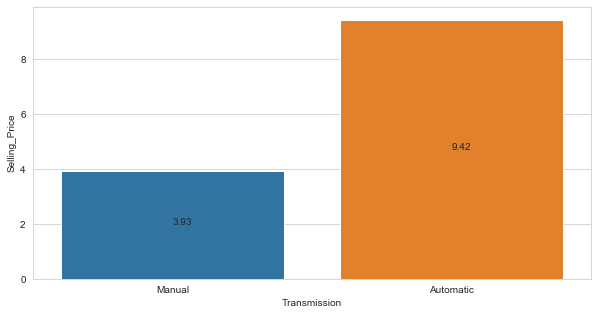

In [15]:
# let's chek the distribution of categorical variables with respect to the selling price
for i in [c for c in cat_v if c != 'Car_Name']:
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    ax3 = sns.barplot(data = raw_df, x=i, y ='Selling_Price',ci=None,estimator = np.mean)
    barh(ax3)
    plt.show()

In [16]:
# we are grouping the whole dataset by Car_Name and then sorting in desending order
#So that we can find the car which has highest selling price
# We are doing this in order to plot the barplot in descending order

df_gc = raw_df.groupby('Car_Name').mean()
df_gc.reset_index(inplace= True)
df_gc[['Car_Name','Selling_Price']].sort_values('Selling_Price', ascending =False)


,Car_Name,Selling_Price
88,land cruiser,35.000000
81,fortuner,18.685455
86,innova,12.777778
72,creta,11.800000
74,elantra,11.600000
...,...,...
18,Hero CBZ Xtreme,0.200000
24,Hero Hunk,0.200000
29,Hero Super Splendor,0.200000
3,Bajaj ct 100,0.180000


In [17]:
type( df_gc.sort_values('Selling_Price',ascending =False)['Car_Name'] )

pandas.core.series.Series

In [18]:
# #We are grouping by Car_Name in order to find 

# df_gc = raw_df [['Car_Name', 'Selling_Price']].groupby('Car_Name').agg({'Selling_Price':'mean'})
# df_gc.reset_index(inplace=True)
# df_gc

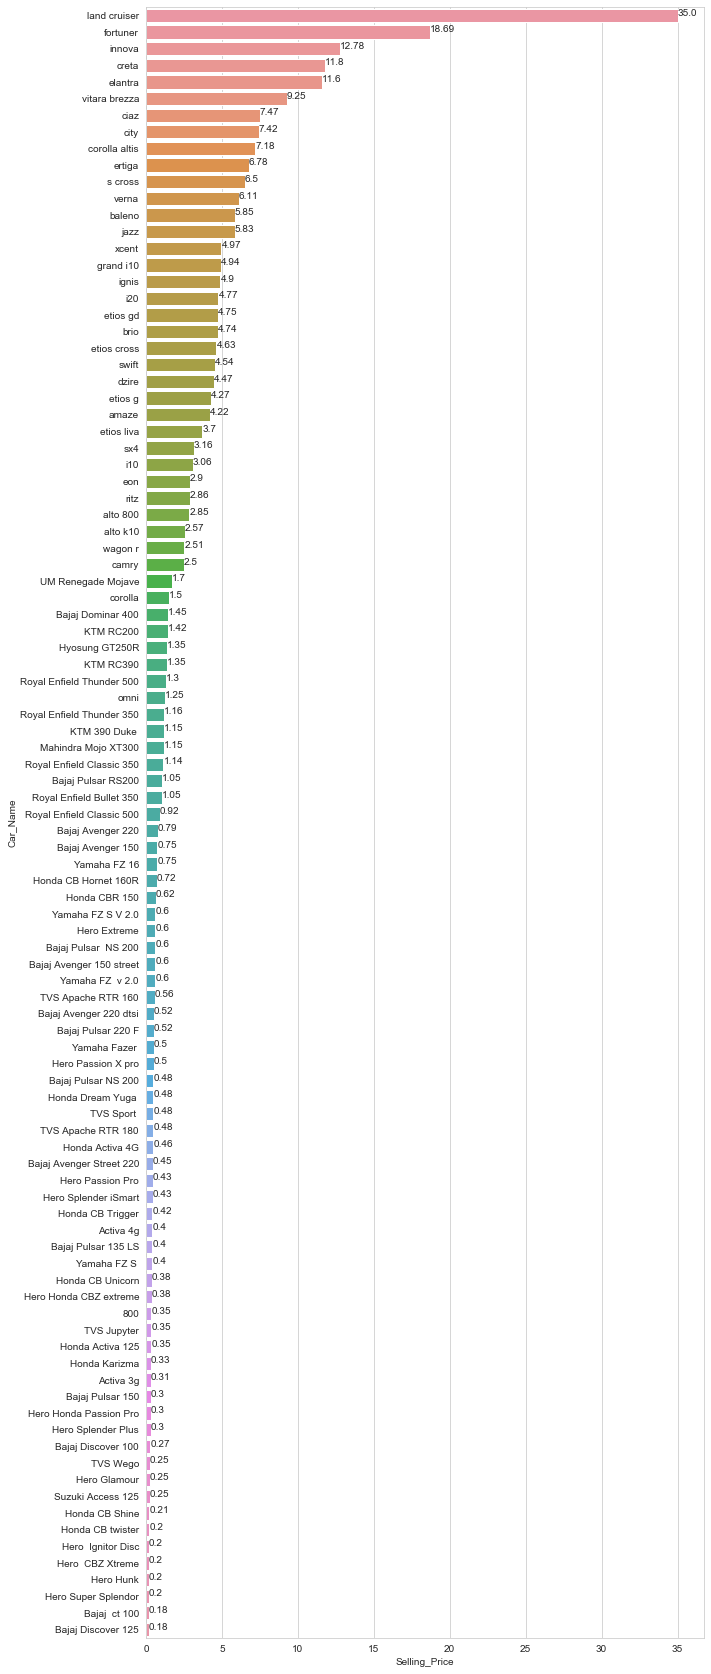

In [19]:


plt.figure(figsize=(10,30))
ax1 = sns.barplot(data = raw_df, x='Selling_Price', y ='Car_Name', order = df_gc.sort_values('Selling_Price',ascending =False)['Car_Name'], ci =None) 
                    #  order = df_gc.sort_values('Selling_Price',ascending =False)['Car_Name'] - We are just giving a series of all car names in an order to print
                    # we have creted this ordered names by sorting the Selling_Price column of df_gc dataframe 
barw(ax1)
plt.show()

### Observations:

#### 1. Diesel Type vehicles have highest selling price (Costly)
#### 2. Dealers have higher effect on selling any vehicles
#### 3. Automatic Gear type vehichles have highest selling price
#### 4. Land Cruiser has highest saleing price (Costly Car)

### Let's check distribution of numerical variables 

In [20]:
#numerica varibles
num_v

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [21]:
raw_df.describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.85,0.95,0.995,0.999])

,Year,Kms_Driven,Owner,Present_Price,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,36947.205980,0.043189,7.628472,4.661296
std,2.891554,38886.883882,0.247915,8.644115,5.082812
min,2003.000000,500.000000,0.000000,0.320000,0.100000
5%,2008.000000,3500.000000,0.000000,0.540000,0.250000
25%,2012.000000,15000.000000,0.000000,1.200000,0.900000
35%,2013.000000,21200.000000,0.000000,3.760000,1.950000
50%,2014.000000,32000.000000,0.000000,6.400000,3.600000
75%,2016.000000,48767.000000,0.000000,9.900000,6.000000
85%,2016.000000,58000.000000,0.000000,13.600000,8.250000


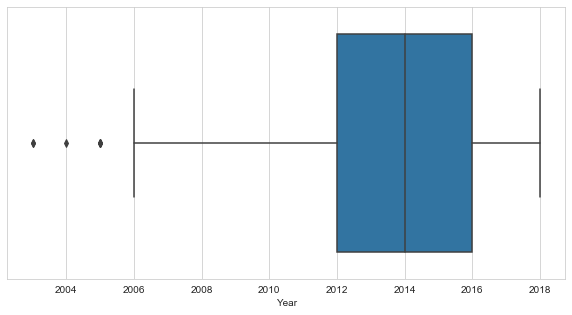

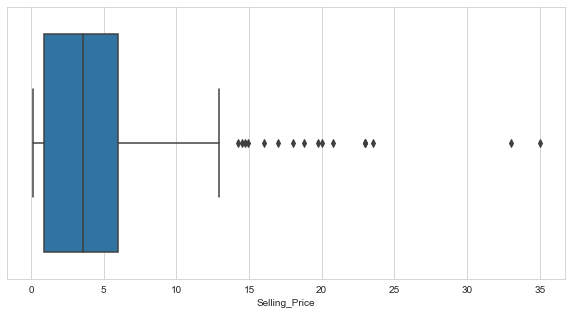

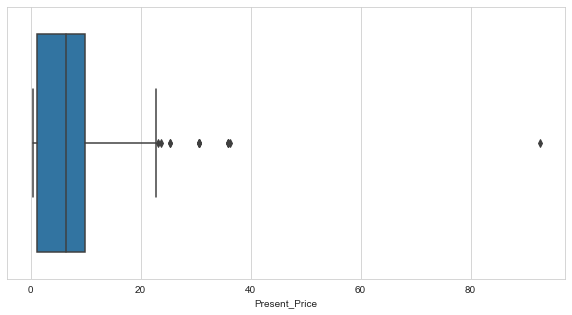

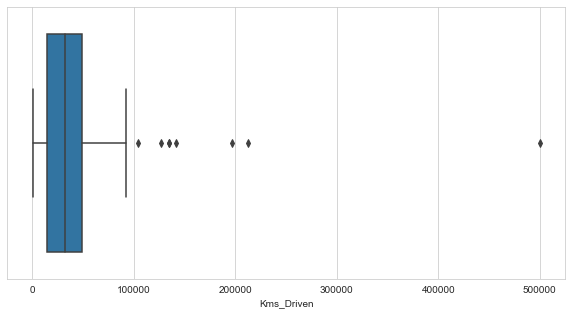

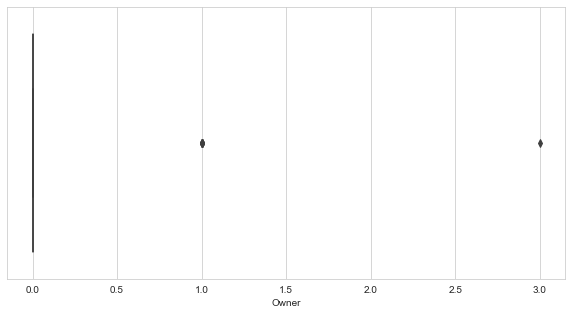

In [22]:
for i in num_v:
    plt.figure(figsize=(10,5))
    sns.boxplot(data= raw_df, x =i)
    plt.show()

### Observations:
#### 1. Outliers present in kms_driven and present price

<Figure size 2160x1080 with 0 Axes>

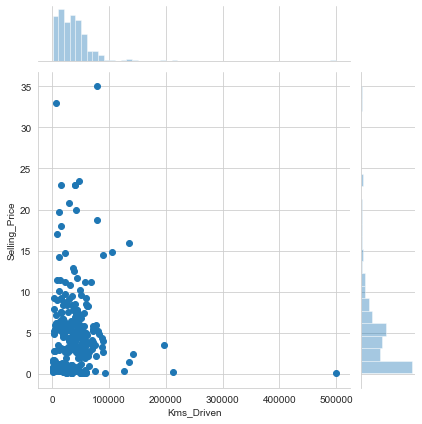

In [23]:
#To see both scaterplot with histogram (distribution of each varible)
plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Kms_Driven',y = 'Selling_Price')
plt.show()

<Figure size 2160x1080 with 0 Axes>

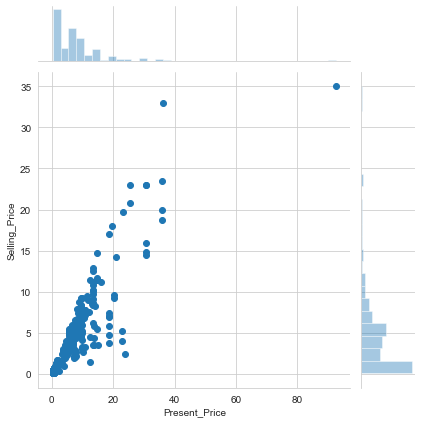

In [24]:
plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Present_Price',y = 'Selling_Price')
plt.show()

In [25]:
raw_df.loc[((raw_df['Present_Price'] ==92.600000 ) | (raw_df['Kms_Driven'] ==500000.000000)),:]

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
86,land cruiser,2010,78000,Diesel,Dealer,Manual,0,92.60,35.00
196,Activa 3g,2008,500000,Petrol,Individual,Automatic,0,0.52,0.17


In [26]:
raw_df.loc[((raw_df['Car_Name'] =='Activa 3g' )|(raw_df['Present_Price'] ==92.600000 ) | (raw_df['Kms_Driven'] ==500000.000000)),:]

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
86,land cruiser,2010,78000,Diesel,Dealer,Manual,0,92.60,35.00
165,Activa 3g,2016,500,Petrol,Individual,Automatic,0,0.54,0.45
196,Activa 3g,2008,500000,Petrol,Individual,Automatic,0,0.52,0.17


<Figure size 2160x1080 with 0 Axes>

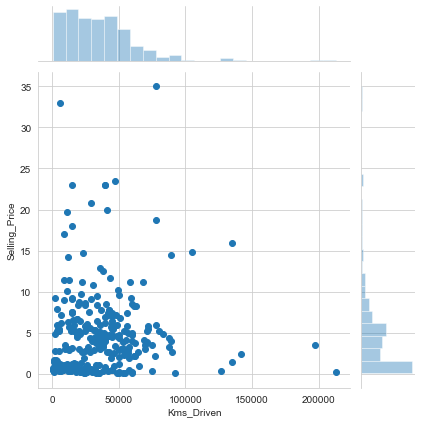

In [27]:
#As we have a very small amount of data points , we are removing only raw_df['Kms_Driven'] ==500000.000000 row, 
# as you can see 500000 is really extream for activa 3g in this dataset

raw_df = raw_df.loc[raw_df['Kms_Driven'] !=500000.000000]

plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Kms_Driven',y = 'Selling_Price')
plt.show()

In [28]:
raw_df.shape

(300, 9)

In [29]:
#As we have removed a row, we are resetting the index
raw_df.reset_index(inplace=True)
raw_df.drop('index', axis =1, inplace= True)
raw_df

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
0,ritz,2014,27000,Petrol,Dealer,Manual,0,5.59,3.35
1,sx4,2013,43000,Diesel,Dealer,Manual,0,9.54,4.75
2,ciaz,2017,6900,Petrol,Dealer,Manual,0,9.85,7.25
3,wagon r,2011,5200,Petrol,Dealer,Manual,0,4.15,2.85
4,swift,2014,42450,Diesel,Dealer,Manual,0,6.87,4.60
...,...,...,...,...,...,...,...,...,...
295,city,2016,33988,Diesel,Dealer,Manual,0,11.60,9.50
296,brio,2015,60000,Petrol,Dealer,Manual,0,5.90,4.00
297,city,2009,87934,Petrol,Dealer,Manual,0,11.00,3.35
298,city,2017,9000,Diesel,Dealer,Manual,0,12.50,11.50


In [30]:
#Again percentiles
raw_df.describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.85,0.95,0.995,0.999])

,Year,Kms_Driven,Owner,Present_Price,Selling_Price
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2013.646667,35403.696667,0.043333,7.652167,4.676267
std,2.877979,28244.294127,0.248317,8.648761,5.084652
min,2003.000000,500.000000,0.000000,0.320000,0.100000
5%,2008.000000,3499.650000,0.000000,0.540000,0.250000
25%,2012.000000,15000.000000,0.000000,1.245000,0.900000
35%,2013.000000,21173.750000,0.000000,3.883500,1.950000
50%,2014.000000,32000.000000,0.000000,6.445000,3.625000
75%,2016.000000,48191.750000,0.000000,9.900000,6.000000
85%,2016.000000,58000.000000,0.000000,13.600000,8.250000


<Figure size 720x720 with 0 Axes>

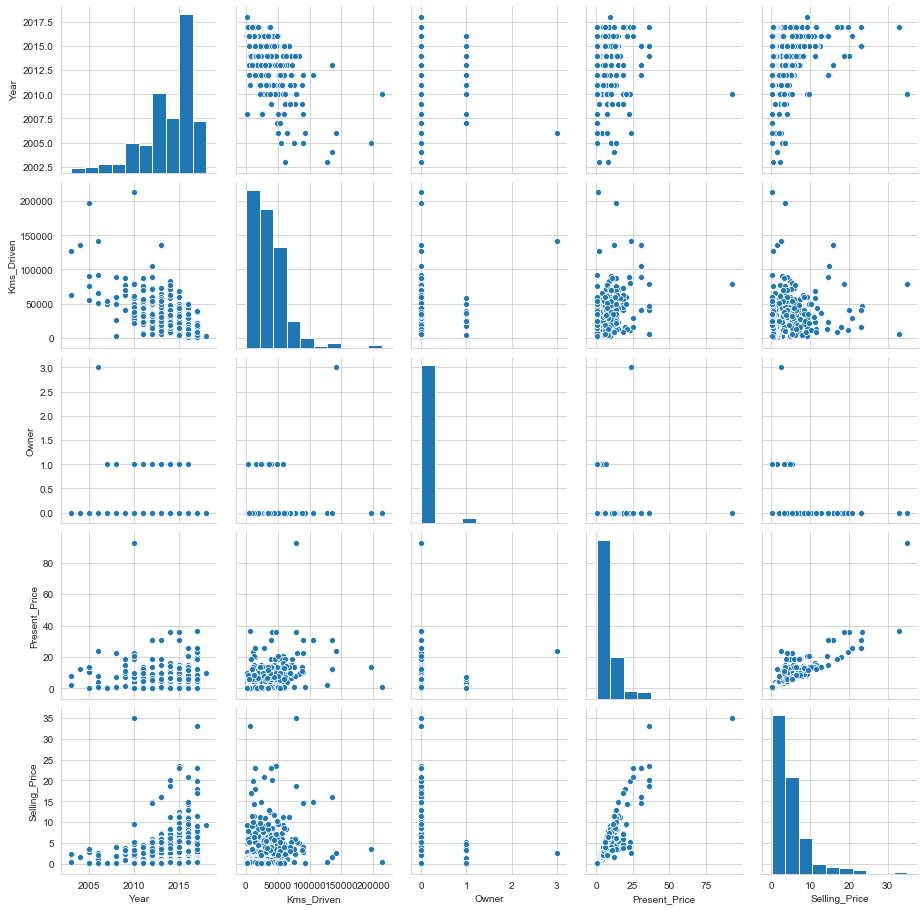

In [31]:
#Lets do a pairplot to see distribution of all numerical variables with selling price
plt.figure(figsize =(10,10))
sns.pairplot(raw_df)
plt.show()

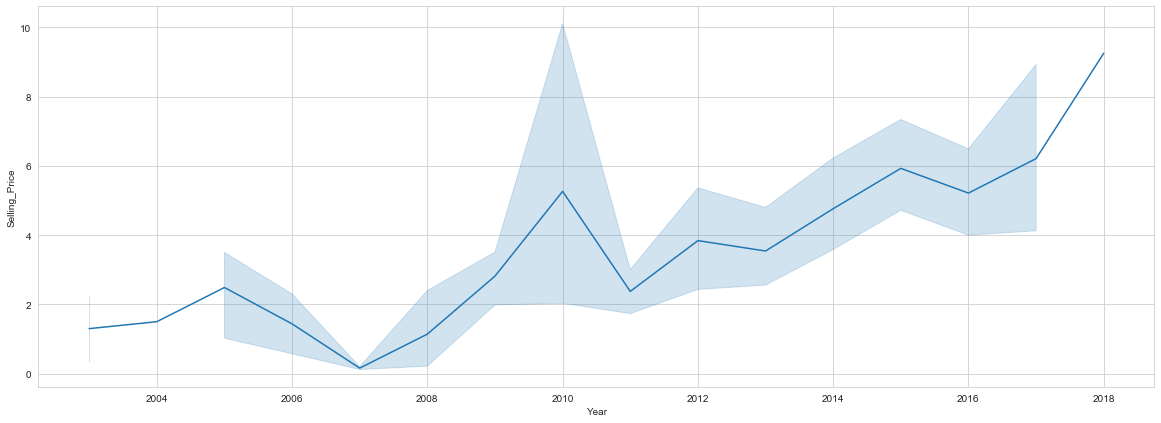

In [32]:
#Lets see the selling price trend with year 

plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Year',y='Selling_Price', markers=True)
plt.show()

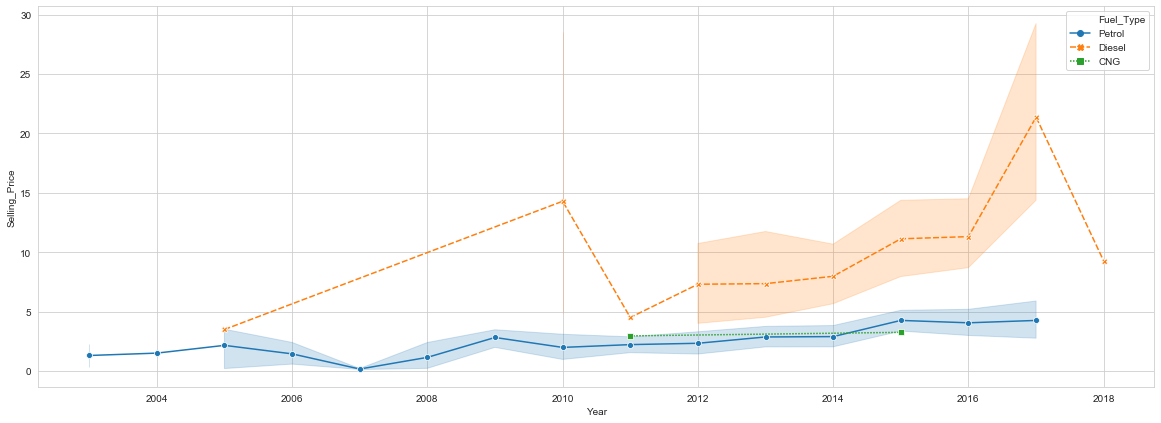

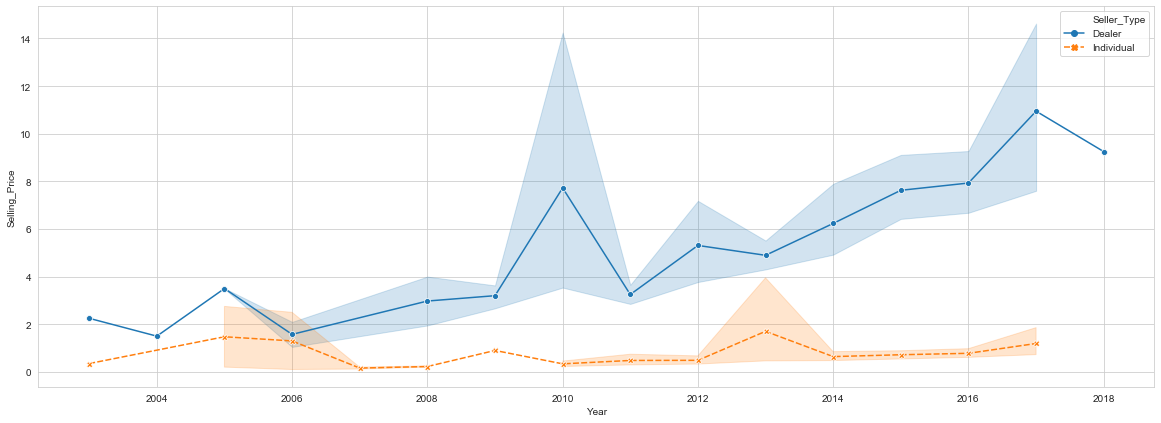

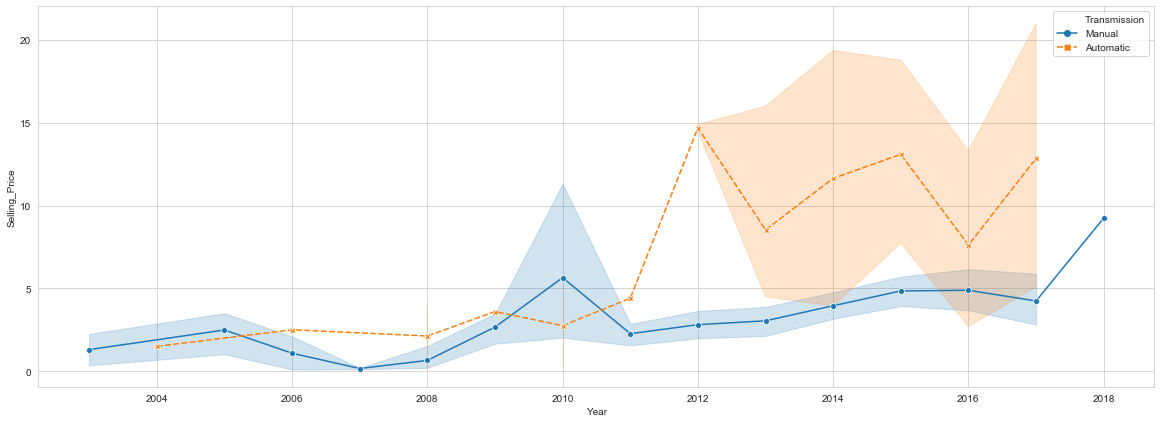

In [33]:
#Checking trend of selling price with respect to cat_v 
for i in [c for c in cat_v if c != 'Car_Name']:
    plt.figure(figsize=(20,7))
    sns.lineplot(data =raw_df, x='Year',y='Selling_Price',hue=i,style =i,markers= True) #hue - to see trend according to each value of a categorical variable
                                                                          #style - to se different line for different values
                                                                          # markers - to see the dotted points
    plt.show()

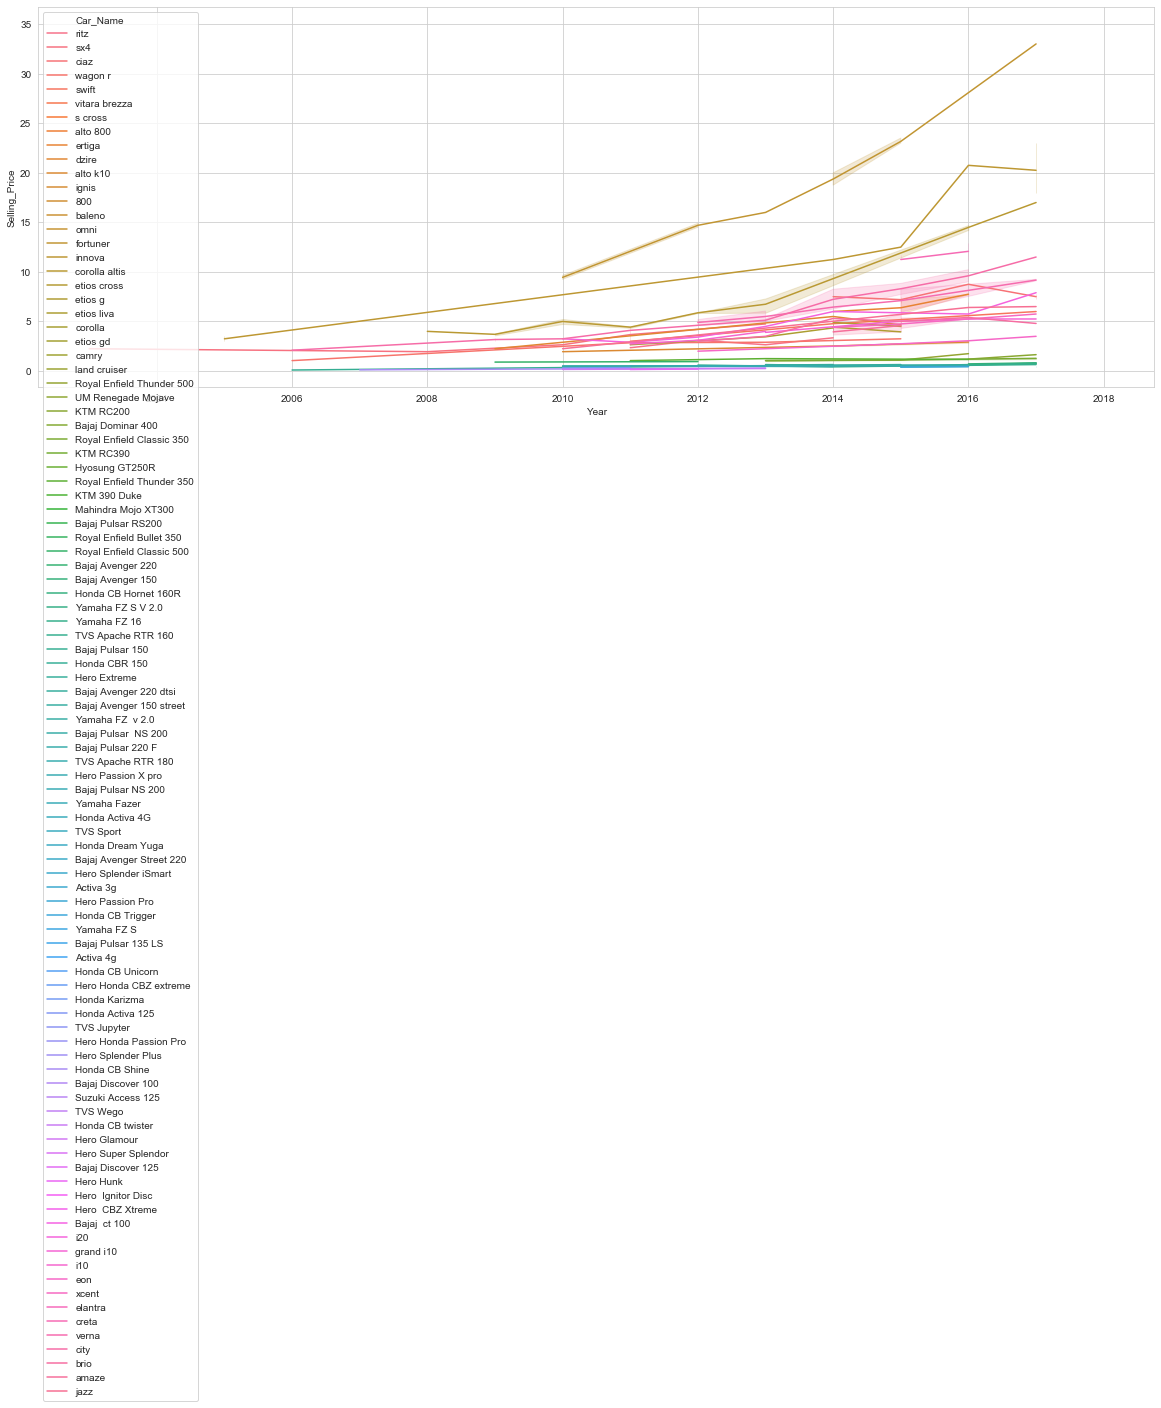

In [34]:
plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Year',y='Selling_Price',hue='Car_Name',estimator =np.mean,markers=True)
plt.show()

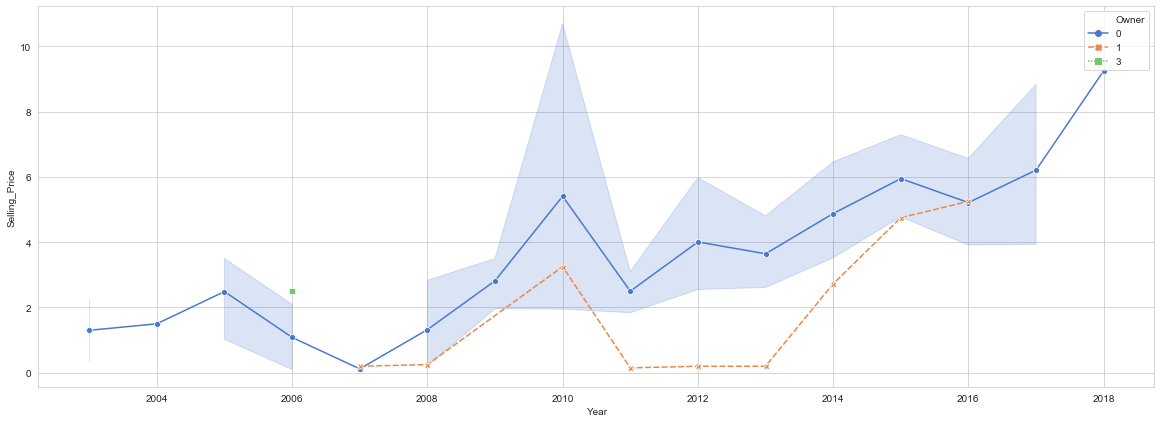

In [35]:
plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Year',y='Selling_Price',hue='Owner',estimator =np.mean,style ='Owner',palette="muted",markers=True)
plt.show()

In [36]:
# Year - Year of manufacture
# Hence We can create 'Age' variable from it
raw_df['Age'] = 2020 - raw_df['Year']

#Dropping the 'Year' variable
raw_df.drop(['Year'], axis= 1,inplace= True)
raw_df.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price,Age
0,ritz,27000,Petrol,Dealer,Manual,0,5.59,3.35,6
1,sx4,43000,Diesel,Dealer,Manual,0,9.54,4.75,7
2,ciaz,6900,Petrol,Dealer,Manual,0,9.85,7.25,3
3,wagon r,5200,Petrol,Dealer,Manual,0,4.15,2.85,9
4,swift,42450,Diesel,Dealer,Manual,0,6.87,4.60,6


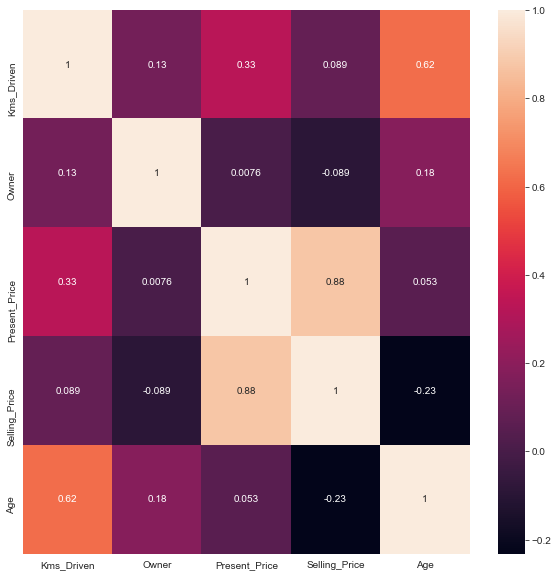

In [37]:
#Checking coorelation

plt.figure(figsize=(10,10))
sns.heatmap(raw_df.corr(),annot =True)
plt.show()

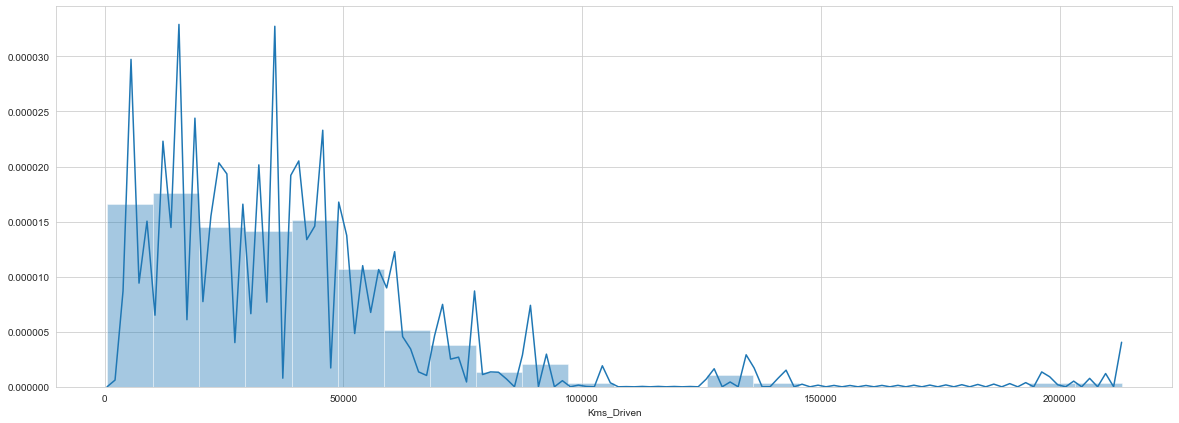

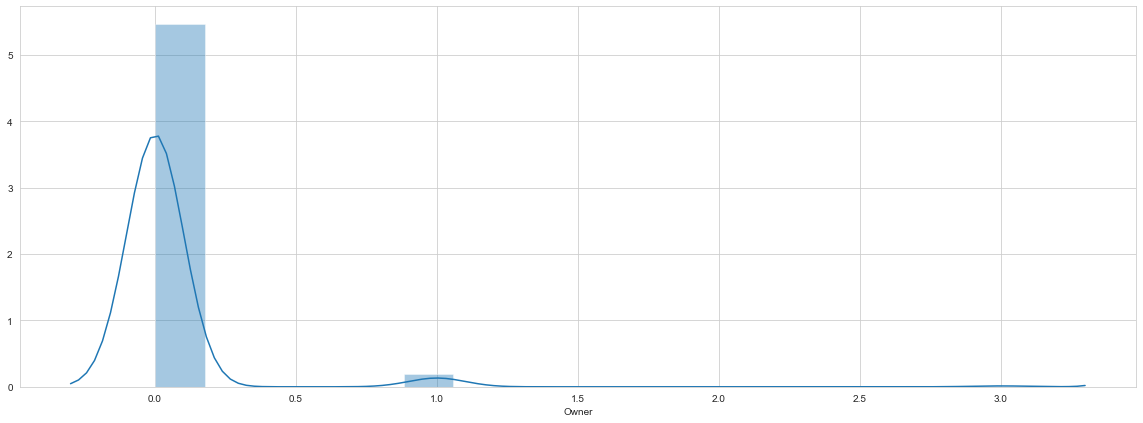

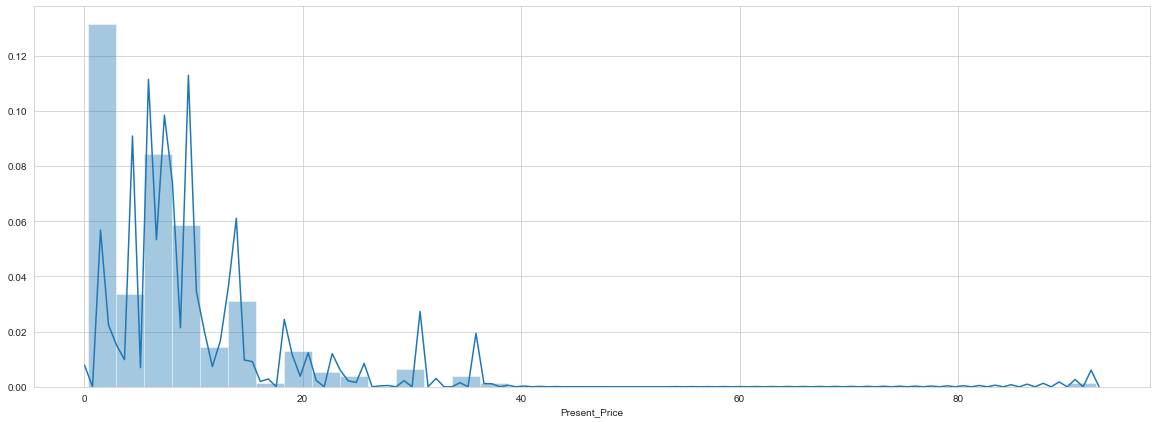

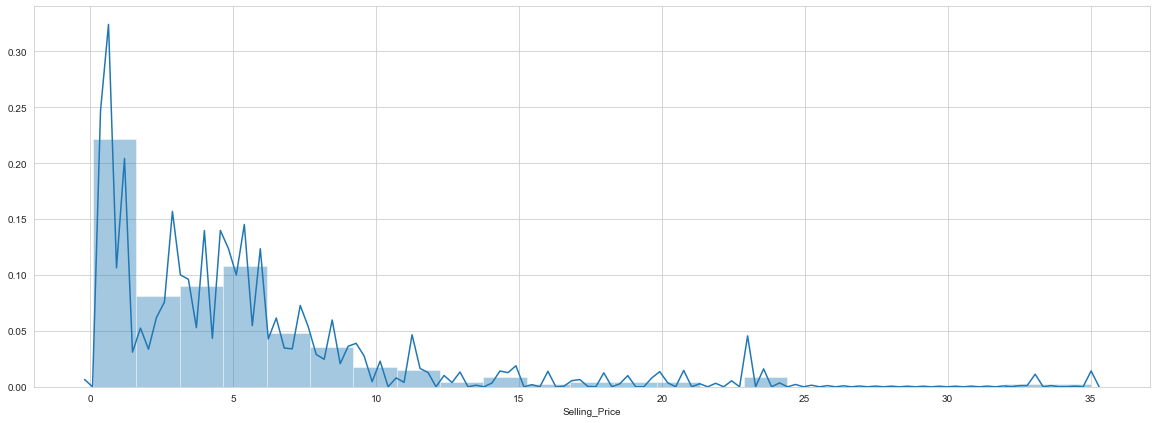

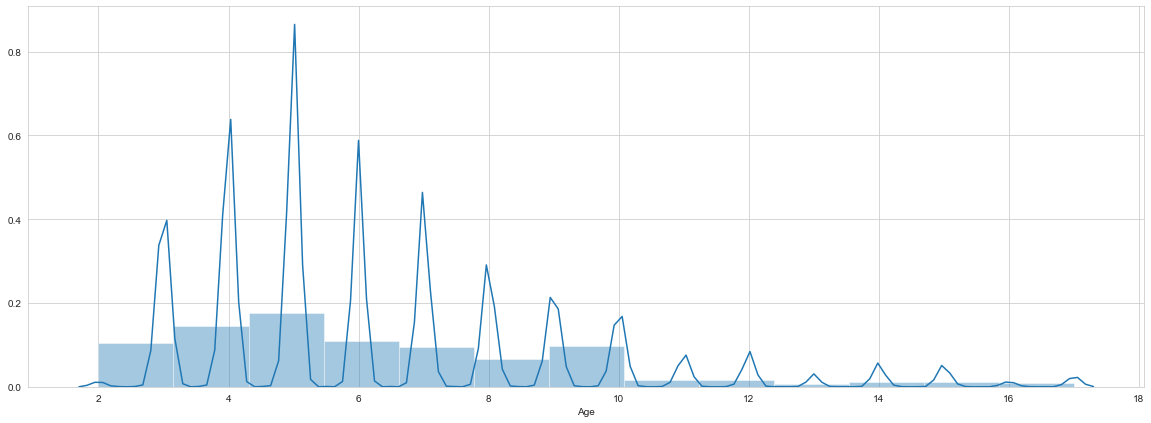

In [38]:
#Checking distribution of each numerical variables
num_v = [i for i in raw_df.columns if i not in cat_v]
for i in num_v:
    plt.figure(figsize=(20,7))
    sns.distplot(raw_df[i],kde_kws={'bw':0.1})

In [39]:
#Measuring skewness
raw_df.skew(axis=0) # -ve sign ----- > left skewed
                    # +ve sign -----  > right skewed

Kms_Driven       2.182300
Owner            7.603739
Present_Price    4.083894
Selling_Price    2.492529
Age              1.262671
dtype: float64

### Treating Skewness

In [40]:
# Treating skewness with PowerTransformer(method='yeo-johnson')
# ['Kms_Driven','Present_Price'] as 'Owner' has only 3 values (there is no continuity) and 'Age' is not that skewed

from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
power.fit(raw_df[['Kms_Driven','Present_Price']])
sk =pd.DataFrame(power.transform(raw_df[['Kms_Driven','Present_Price']]),columns = ['Kms_Driven','Present_Price'])
sk.head()

,Kms_Driven,Present_Price
0,-0.076216,0.109377
1,0.505730,0.638013
2,-1.306789,0.670879
3,-1.493457,-0.165304
4,0.488258,0.308344


In [41]:
sk.shape

(300, 2)

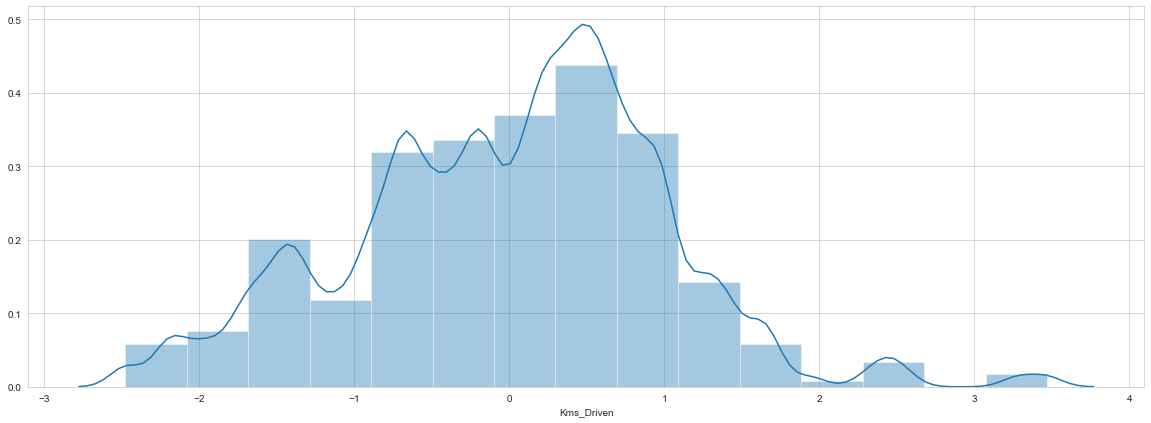

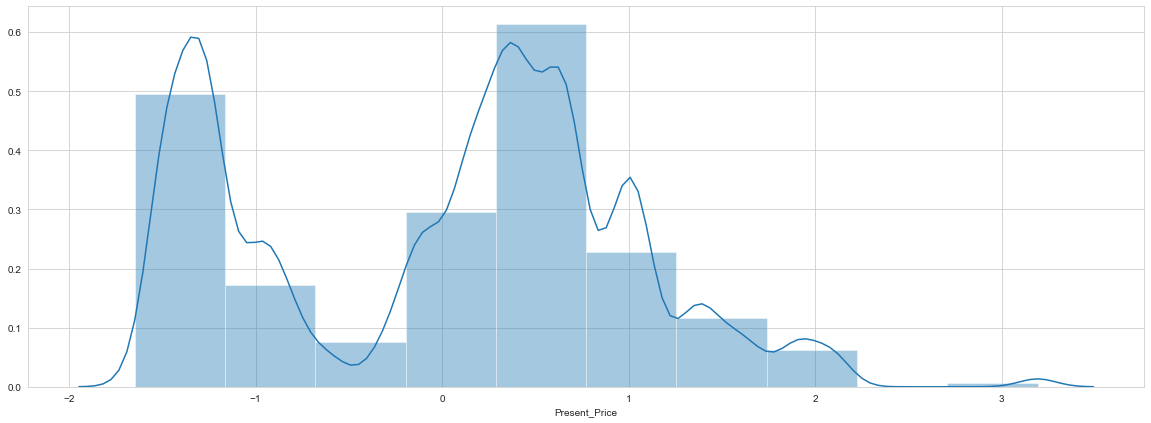

In [42]:
for i in ['Kms_Driven','Present_Price']:
    plt.figure(figsize=(20,7))
    sns.distplot(sk[i],kde_kws={'bw':0.1})

In [43]:
# Removing ['Kms_Driven','Present_Price']
raw_df.drop(['Kms_Driven','Present_Price'],axis =1, inplace =True)
df_sk = pd.concat([sk,raw_df],axis =1)
df_sk.head()

,Kms_Driven,Present_Price,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Age
0,-0.076216,0.109377,ritz,Petrol,Dealer,Manual,0,3.35,6
1,0.505730,0.638013,sx4,Diesel,Dealer,Manual,0,4.75,7
2,-1.306789,0.670879,ciaz,Petrol,Dealer,Manual,0,7.25,3
3,-1.493457,-0.165304,wagon r,Petrol,Dealer,Manual,0,2.85,9
4,0.488258,0.308344,swift,Diesel,Dealer,Manual,0,4.60,6


### Checking for missing values

In [44]:
#Checking for missing values
df_sk.isnull().sum()

Kms_Driven       0
Present_Price    0
Car_Name         0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
Age              0
dtype: int64

### No outliers

### Feature Engineering

In [45]:
cat_v

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [46]:
num_v = [i for i in df_sk.columns if i not in cat_v]
num_v

['Kms_Driven', 'Present_Price', 'Owner', 'Selling_Price', 'Age']

In [47]:
#unique values in cat_v
for i in cat_v:
    print('Total number of unique values in {} is {}'.format(i, len(df_sk[i].unique())))

Total number of unique values in Car_Name is 98
Total number of unique values in Fuel_Type is 3
Total number of unique values in Seller_Type is 2
Total number of unique values in Transmission is 2


### Observations:
#### 1. All categorial variables are nominal or unordered categorial variabls
#### 2. We can use one hot encoding for Fuel_Type, Seller_Type, Transmission as dimension of the dataframe won't be huge
#### 3. We can use LeaveOneOutEncoder for Car_Name as if we use one hot encoding then we would get a dataframe with huge dimension

In [48]:
#Encoding Fuel_Type, Seller_Type, Transmission

dummy = pd.get_dummies(df_sk[['Fuel_Type', 'Seller_Type', 'Transmission']],drop_first= True)
dummy

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1
...,...,...,...,...
295,1,0,0,1
296,0,1,0,1
297,0,1,0,1
298,1,0,0,1


In [49]:
df_t1 = pd.concat([dummy,df_sk],axis =1)
df_t1.drop(['Fuel_Type', 'Seller_Type', 'Transmission'],axis =1, inplace= True)
df_t1

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Car_Name,Owner,Selling_Price,Age
0,0,1,0,1,-0.076216,0.109377,ritz,0,3.35,6
1,1,0,0,1,0.505730,0.638013,sx4,0,4.75,7
2,0,1,0,1,-1.306789,0.670879,ciaz,0,7.25,3
3,0,1,0,1,-1.493457,-0.165304,wagon r,0,2.85,9
4,1,0,0,1,0.488258,0.308344,swift,0,4.60,6
...,...,...,...,...,...,...,...,...,...,...
295,1,0,0,1,0.199199,0.840853,city,0,9.50,4
296,0,1,0,1,0.987829,0.160806,brio,0,4.00,5
297,0,1,0,1,1.618745,0.785312,city,0,3.35,11
298,1,0,0,1,-1.112871,0.919526,city,0,11.50,3


In [50]:
# !pip install category_encoders

### Reason for choosing LeaveOneOutEncoder
###### https://innovation.alteryx.com/encode-smarter/
###### https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark

In [51]:
from category_encoders.leave_one_out import LeaveOneOutEncoder
looe = LeaveOneOutEncoder(random_state = 10)
looe.fit(df_t1['Car_Name'],df_t1['Selling_Price'])

dum = looe.transform(df_t1['Car_Name'])
dum

,Car_Name
0,2.862500
1,3.158333
2,7.472222
3,2.512500
4,4.540000
...,...
295,7.419231
296,4.745000
297,7.419231
298,7.419231


In [52]:
df_t1.drop('Car_Name', axis =1, inplace= True) # Dropping the Car_Name column
df_final= pd.concat([dum,df_t1],axis=1)
df_final

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Owner,Selling_Price,Age
0,2.862500,0,1,0,1,-0.076216,0.109377,0,3.35,6
1,3.158333,1,0,0,1,0.505730,0.638013,0,4.75,7
2,7.472222,0,1,0,1,-1.306789,0.670879,0,7.25,3
3,2.512500,0,1,0,1,-1.493457,-0.165304,0,2.85,9
4,4.540000,1,0,0,1,0.488258,0.308344,0,4.60,6
...,...,...,...,...,...,...,...,...,...,...
295,7.419231,1,0,0,1,0.199199,0.840853,0,9.50,4
296,4.745000,0,1,0,1,0.987829,0.160806,0,4.00,5
297,7.419231,0,1,0,1,1.618745,0.785312,0,3.35,11
298,7.419231,1,0,0,1,-1.112871,0.919526,0,11.50,3


## Model Building

In [53]:
#Splitting into X and y

y = df_final.pop('Selling_Price')
X = df_final
X

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Owner,Age
0,2.862500,0,1,0,1,-0.076216,0.109377,0,6
1,3.158333,1,0,0,1,0.505730,0.638013,0,7
2,7.472222,0,1,0,1,-1.306789,0.670879,0,3
3,2.512500,0,1,0,1,-1.493457,-0.165304,0,9
4,4.540000,1,0,0,1,0.488258,0.308344,0,6
...,...,...,...,...,...,...,...,...,...
295,7.419231,1,0,0,1,0.199199,0.840853,0,4
296,4.745000,0,1,0,1,0.987829,0.160806,0,5
297,7.419231,0,1,0,1,1.618745,0.785312,0,11
298,7.419231,1,0,0,1,-1.112871,0.919526,0,3


In [54]:
# columns of X
colx = X.columns
colx

Index(['Car_Name', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual', 'Kms_Driven',
       'Present_Price', 'Owner', 'Age'],
      dtype='object')

In [55]:
#Spliting into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)
X_train.head()

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Owner,Age
283,4.745000,0,1,0,1,-1.046608,0.160806,0,7
97,7.183125,0,1,0,1,-1.138680,1.349751,0,3
275,7.419231,0,1,0,1,-0.172173,1.009038,0,5
262,5.828571,0,1,0,1,-0.621988,0.421184,0,4
132,0.790000,0,1,1,1,-1.724197,-1.228426,0,3


In [56]:
print('Shape of X_train --- > {} and X_test --- > {}'.format(X_train.shape,X_test.shape))

Shape of X_train --- > (210, 9) and X_test --- > (90, 9)


In [57]:
print('Shape of y_train --- > {} and y_test --- > {}'.format(y_train.shape,y_test.shape))

Shape of y_train --- > (210,) and y_test --- > (90,)


In [58]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train,y_train)

y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

In [59]:
#Scoring 

from sklearn.metrics import mean_squared_error as mse

print('mse for train : {}'.format(round(mse(y_train,y_train_pred),2)))
print('mse for test : {}'.format(round(mse(y_test,y_test_pred),2)))

mse for train : 4.7
mse for test : 5.49


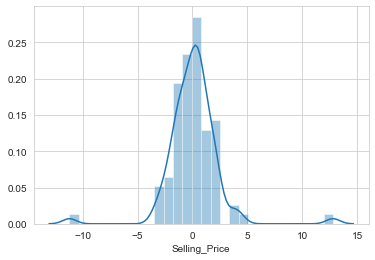

In [60]:
#Checking distribution of errors

sns.distplot(y_test-y_test_pred)

In [61]:
#Randomforest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1200, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [i for i in range(2,11,2)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [20, 104, 188, 272, 357, 441, 525, 610, 694, 778, 862, 947, 1031, 1115, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
#Doing a cross validation to find best parameters

rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)


grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',random_state =100)

grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=10,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=10,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                    

In [63]:
#Best parameters

grid_rf.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8}

In [64]:
#model with best parameters

rf= RandomForestRegressor(n_estimators=20,criterion='mse', 
                                 max_depth=8, min_samples_split=5,
                                 min_samples_leaf=2, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [65]:
#Prediction

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#Scoring
print('mse for train : {}'.format(round(mse(y_train,y_train_pred),2)))
print('mse for test : {}'.format(round(mse(y_test,y_test_pred),2)))

mse for train : 1.29
mse for test : 2.68


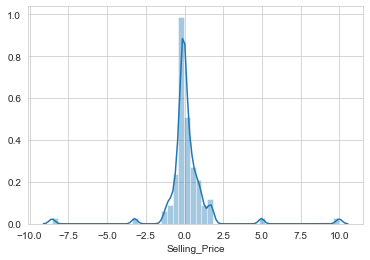

In [66]:
#Checking error distribution

sns.distplot(y_test-y_test_pred)

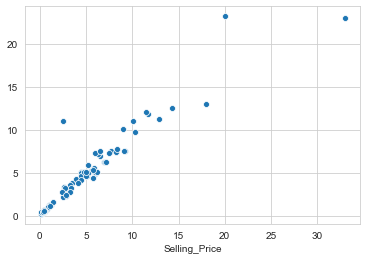

In [67]:
#Scatterplot

sns.scatterplot(y_test,y_test_pred)

In [68]:
#Saving the model

import pickle

file = open('rf_final.pkl','wb')
pickle.dump(rf,file)

In [69]:
#saving the transformer power

# filek = open('kms_present_transformer.pkl','wb')
pickle.dump(power,open('kms_present_transformer.pkl','wb'))

In [70]:
#saving the encoder

# filex = open('leave_one_out_encoder.pkl','wb')
pickle.dump(looe,open('leave_one_out_encoder.pkl','wb'))

In [71]:
col_raw

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [72]:
transformer = pickle.load(open('kms_present_transformer.pkl','rb'))

transformer.transform([[45333,6.5]])

array([[0.57830902, 0.25426593]])

In [73]:
d = pd.DataFrame({'Car_Name':['swift']})
d

,Car_Name
0,swift


In [74]:
encoder = pickle.load(open('leave_one_out_encoder.pkl','rb'))
r = encoder.transform(d['Car_Name'])
r                           

,Car_Name
0,4.54


In [75]:
r['Car_Name']

0    4.54
Name: Car_Name, dtype: float64

In [76]:
x = r['Car_Name']
x

0    4.54
Name: Car_Name, dtype: float64

In [77]:
colx = X_train.columns
colx

Index(['Car_Name', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual', 'Kms_Driven',
       'Present_Price', 'Owner', 'Age'],
      dtype='object')

In [78]:
model = pickle.load(open('rf_final.pkl','rb'))
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [79]:
X_train.iloc[0]

Car_Name                  4.745000
Fuel_Type_Diesel          0.000000
Fuel_Type_Petrol          1.000000
Seller_Type_Individual    0.000000
Transmission_Manual       1.000000
Kms_Driven               -1.046608
Present_Price             0.160806
Owner                     0.000000
Age                       7.000000
Name: 283, dtype: float64

In [80]:
model.predict([[x,1.0,0.0,2.0,1.0,2.5,0.5,0.0,7.0]])

array([4.89043344])

In [81]:
model.predict([[x,1,0,1,1,5000,25,10,5]])

array([20.78639881])

In [82]:
h= transformer.transform([[5000,25]])
h

array([[-1.51784251,  1.67475705]])

In [83]:
model.predict([[x,1,0,1,1,h[0][0], h[0][1],3,5]])

array([21.24761012])